# Hierarchical clustering: structured vs unstructured ward

- 스위스 롤 데이터셋을 생성하고 위치에 대한 Hierarchical clustering을 실행한다.
- 구조에서 연결 제약 없이 거리만을 기반으로 hierarchical clustering을 수행한다.
- 클러스터링을 k-Nearest Neighbors 그래프로 제한한다.
- structure prior이 있는 hierarchical clustering이다.
- 연결 제약 없이 학습된 일부 클러스터는 스위스 롤의 구조를 존중하지 않고 매니폴드의 여러 폴드에 걸쳐 확장된다.
- 연결 제약을 가하면 클러스터는 스위스 롤의 좋은 구획을 형성한다.

In [1]:
import time as time

import mpl_toolkits.mplot3d  
import numpy as np

## Generate data

In [2]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# 더 얇게 만든다.
X[:, 1] *= 0.5

## Compute clustering

In [3]:
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute unstructured hierarchical clustering...
Elapsed time: 0.02s
Number of points: 1500


## Plot result

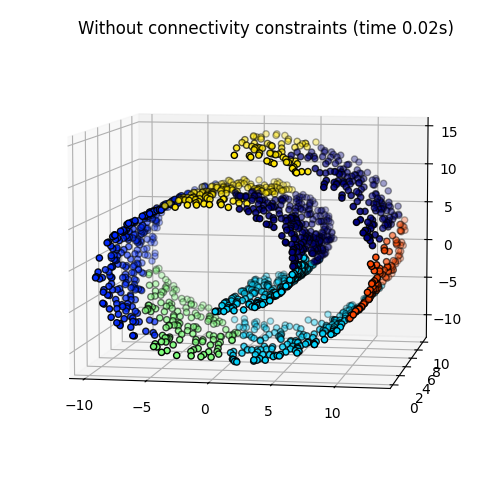

In [4]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")

## We are difining k-Nearest Neighbor with 10 neighbors

In [5]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

## Compute clustering

In [6]:
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute structured hierarchical clustering...
Elapsed time: 0.03s
Number of points: 1500


## Plot result

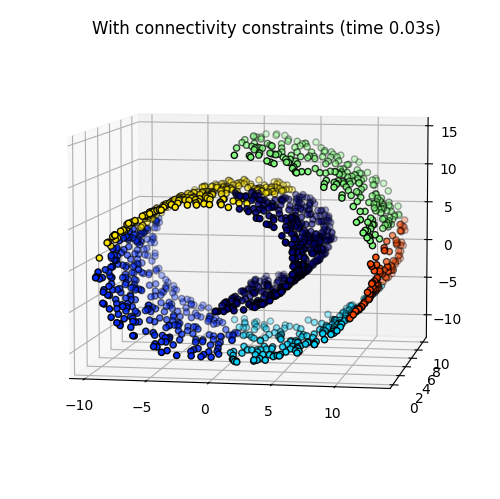

In [7]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=-80)
ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig2.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")

plt.show()